In [7]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline
warnings.filterwarnings('ignore') # if there are any warning due to version mismatch, it will be ignored


In [78]:
import numpy
print('numpy:', numpy.__version__)

import pandas
print('pandas:', pandas.__version__)

import matplotlib
print('matplotlib:', matplotlib.__version__)

import seaborn
print('seaborn:', seaborn.__version__)

import scipy
print('scipy:', scipy.__version__)

import sklearn
print('sklearn:', sklearn.__version__)

import statsmodels
print('statsmodels:', statsmodels.__version__)

numpy: 1.24.3
pandas: 2.0.3
matplotlib: 3.7.2
seaborn: 0.12.2
scipy: 1.11.1
sklearn: 1.3.0
statsmodels: 0.14.0


## Data Understanding

In [8]:
# Reading the data
# Specify the path of your CSV file
file_path = '/Users/DELL/Downloads/Python Notebook/day.csv'
bike = pd.read_csv(file_path)
# Viewing the first 5 rows to see how the data looks like
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [9]:
bike.shape

(730, 16)

In [10]:
# Checking any missing values
c = bike.isnull().sum()
print(c)

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


##### By observing data we get to know that there are no missing values in the dataset

In [11]:
# Checking summary of all the numeric columns in the dataset
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [13]:
# Checking Datatype of each column
bike.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [14]:
# Renaming few columns for better understanding
bike.rename(columns = {'yr':'Year','mnth':'month','hum':'humidity','cnt':'count'}, inplace = True)
bike.head()

,instant,dteday,season,Year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


## Data Preparation

##### We are eliminating certain columns that are not necessary for our model:
- The 'Instant' column, which simply denotes the row number, is not required.
- The 'Casual' and 'Registered' columns are not needed because our dependent variable is a count.
- The 'dteday' and 'yr month' columns contain identical information. To prevent any confusion, we will remove the 'dteday' column. 
This ensures that our model only includes relevant data.

In [15]:
bike.drop(columns=["instant","casual","registered","dteday"],inplace=True)
bike.head()

,season,Year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,count
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [16]:
# Checking Correlation between numerical variables
bike[['temp','atemp','humidity','windspeed','count']].corr()


,temp,atemp,humidity,windspeed,count
temp,1.000000,0.991696,0.128565,-0.158186,0.627044
atemp,0.991696,1.000000,0.141512,-0.183876,0.630685
humidity,0.128565,0.141512,1.000000,-0.248506,-0.098543
windspeed,-0.158186,-0.183876,-0.248506,1.000000,-0.235132
count,0.627044,0.630685,-0.098543,-0.235132,1.000000


#### When two features have a correlation that is near 1 (or -1), it suggests a high degree of similarity. In such cases, it's generally recommended to remove one of these highly correlated features to avoid redundancy. 
 - Therefore, we will also be discarding the 'atemp' column.

In [19]:
# Dropping atemp column from the dataset 
bike.drop(columns=["atemp"], inplace=True)
bike.head()

,season,Year,month,holiday,weekday,workingday,weathersit,temp,humidity,windspeed,count
0,1,0,1,0,6,0,2,14.110847,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,43.6957,12.522300,1600


In [20]:
# Converting variables like season, month, weathersit, weekday into categorical string values
bike['season'] = bike.season.map({1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'})
bike['month']=bike.month.map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})
bike['weathersit']=bike.weathersit.map({1: 'Clear',2:'Mist + Cloudy',3:'Light Snow',4:'Snow + Fog'})
bike['weekday']=bike.weekday.map({0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'})

bike.head()

,season,Year,month,holiday,weekday,workingday,weathersit,temp,humidity,windspeed,count
0,spring,0,Jan,0,Sat,0,Mist + Cloudy,14.110847,80.5833,10.749882,985
1,spring,0,Jan,0,Sun,0,Mist + Cloudy,14.902598,69.6087,16.652113,801
2,spring,0,Jan,0,Mon,1,Clear,8.050924,43.7273,16.636703,1349
3,spring,0,Jan,0,Tue,1,Clear,8.200000,59.0435,10.739832,1562
4,spring,0,Jan,0,Wed,1,Clear,9.305237,43.6957,12.522300,1600


# EDA

#### We are creating visual representations of the numerical variables to identify which ones have the strongest correlation with our target variable, 'count'.

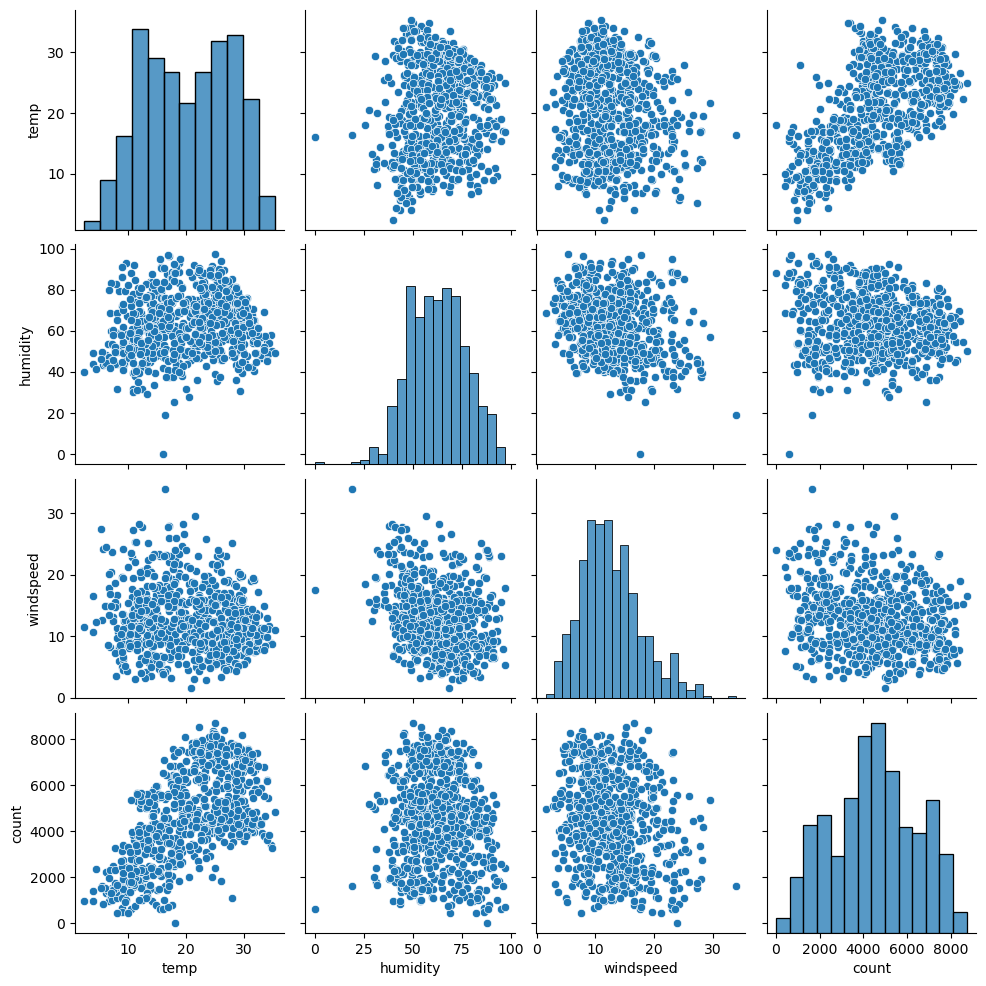

In [23]:
#Pairplot for numeric variables
sns.pairplot(bike, vars=["temp", "humidity",'windspeed','count'])
plt.show()

#### The pair plots above reveal that certain independent variables have a positive correlation with the 'count' variable. Notably, bike rentals show a stronger correlation with temperature.

We are now going to visualize the categorical variables to determine which ones have the most significant correlation with our target variable, 'count'.

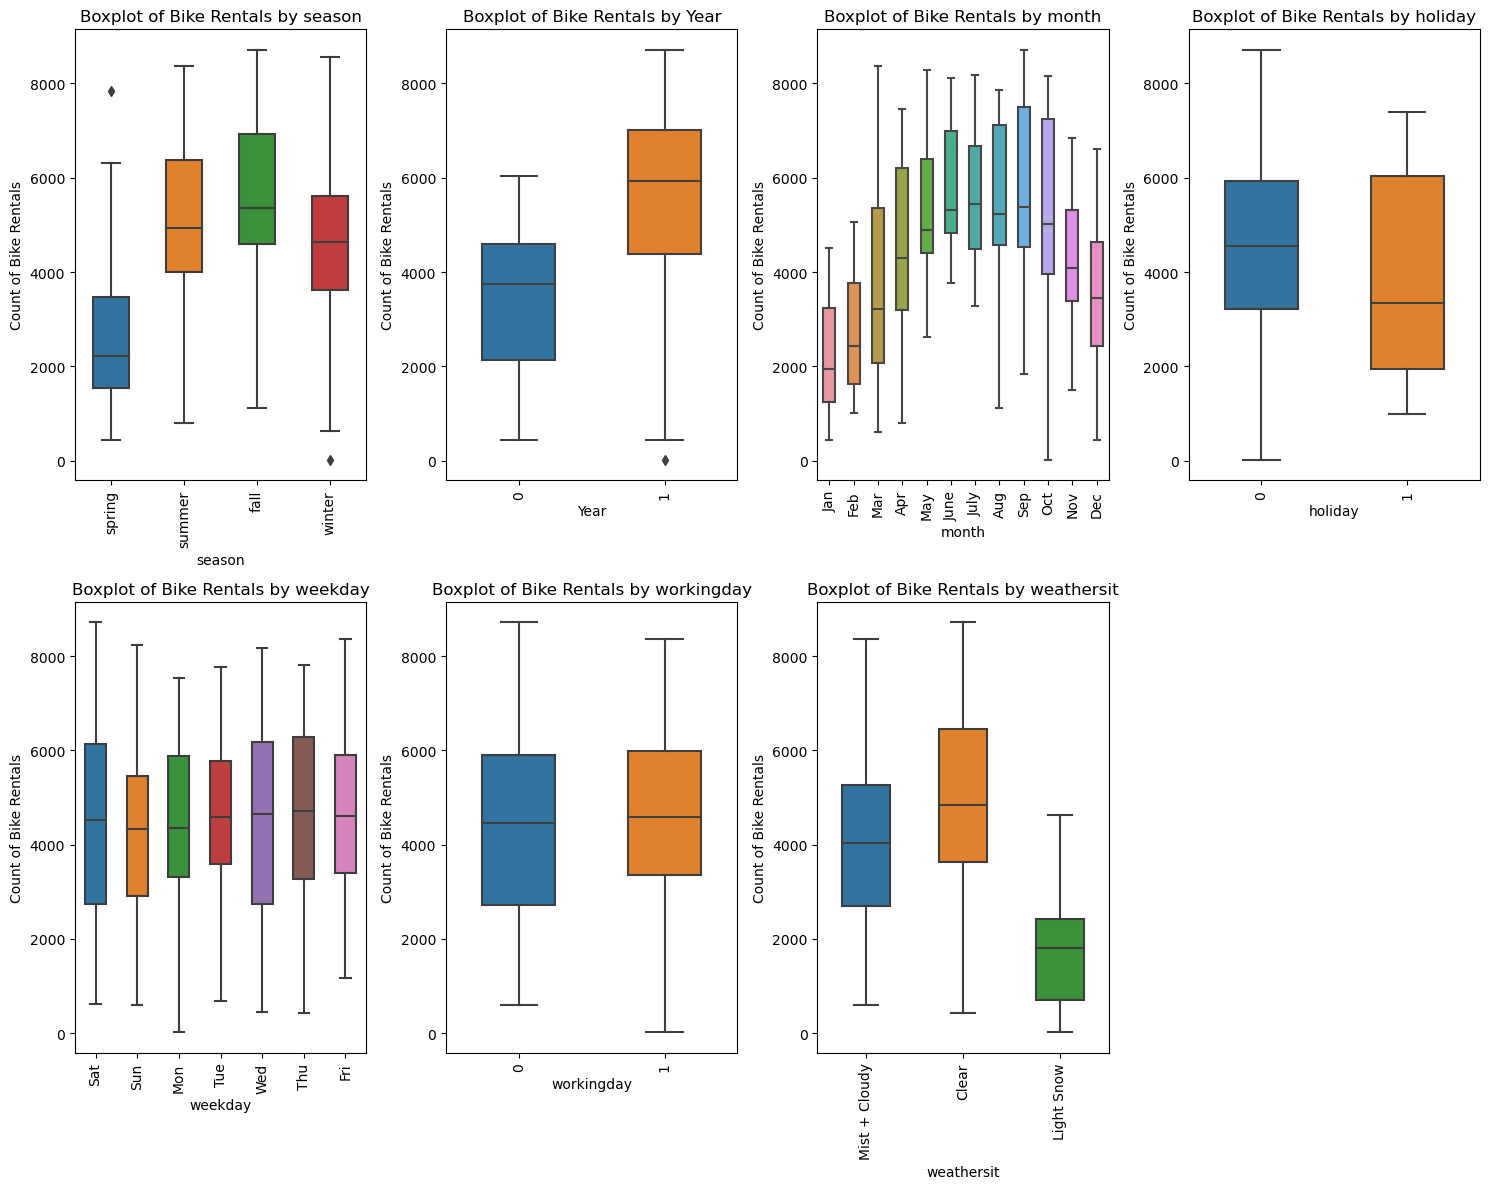

In [26]:
cat_vars = ['season', 'Year', 'month', 'holiday', 'weekday', 'workingday', 'weathersit']

plt.figure(figsize=(15, 12))
for i, cat_var in enumerate(cat_vars, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(x=cat_var, y='count', data=bike, width=0.5)
    plt.title(f'Boxplot of Bike Rentals by {cat_var}')
    plt.xlabel(cat_var)
    plt.ylabel('Count of Bike Rentals')
    plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

#### The box plots above provide several insights:
- Bike rentals tend to increase during the Fall season, followed by the Summer season.
- The year 2019 saw a higher number of bike rentals compared to 2018.
- September recorded the highest count of bike rentals, with the surrounding months also showing a high demand. This trend aligns with the seasonal patterns, suggesting a correlation between bike rentals and seasons.
- Partly cloudy weather conditions seem to favor bike rentals.
- Bike rentals are more prevalent on Saturdays, Wednesdays, and Thursdays.
- Holidays typically see a decrease in bike rentals compared to regular working days, with a greater variability in rental demand observed during holidays.

#### Understanding Correlation between categorical and numerical values

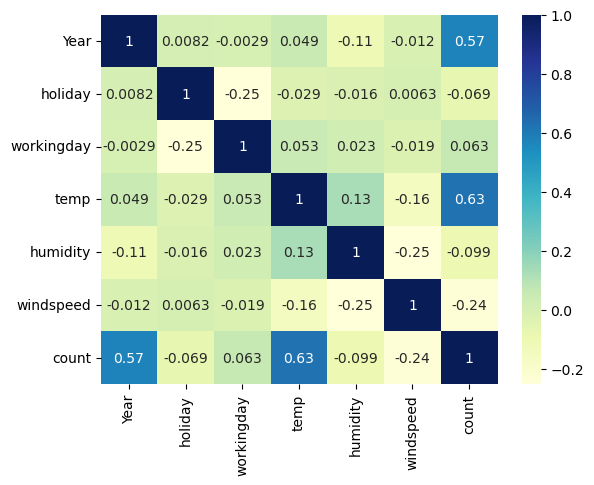

In [27]:
# Checking correlation
#plt.figure(figsize=(25, 12))
sns.heatmap(bike[['Year','holiday','workingday','temp','humidity','windspeed','count']].corr(), cmap='YlGnBu', annot = True)
plt.show()

#### Highest correlation with count is seen in temp followed by Year.

# Data Preparation

In [29]:
# Create dummy variables using pd.get_dummies for month, season, weathersit, weekday and let's drop the first column from  using 'drop_first = True'

months=pd.get_dummies(bike.month,drop_first=True, dtype='int')
weekdays=pd.get_dummies(bike.weekday,drop_first=True, dtype='int')
weather_sit=pd.get_dummies(bike.weathersit,drop_first=True, dtype='int')
seasons=pd.get_dummies(bike.season,drop_first=True, dtype='int')


In [30]:
# Adding indicator variable columns to the dataset . Dropping original columns
bike=pd.concat([months,weekdays,weather_sit,seasons,bike],axis=1)
bike.drop(['season','month','weekday','weathersit'], axis = 1, inplace = True)
bike.head()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,...,spring,summer,winter,Year,holiday,workingday,temp,humidity,windspeed,count
0,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,14.110847,80.5833,10.749882,985
1,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,14.902598,69.6087,16.652113,801
2,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,1,8.050924,43.7273,16.636703,1349
3,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,1,8.200000,59.0435,10.739832,1562
4,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,1,9.305237,43.6957,12.522300,1600


In [31]:
# Number of rows and columns
bike.shape

(730, 29)

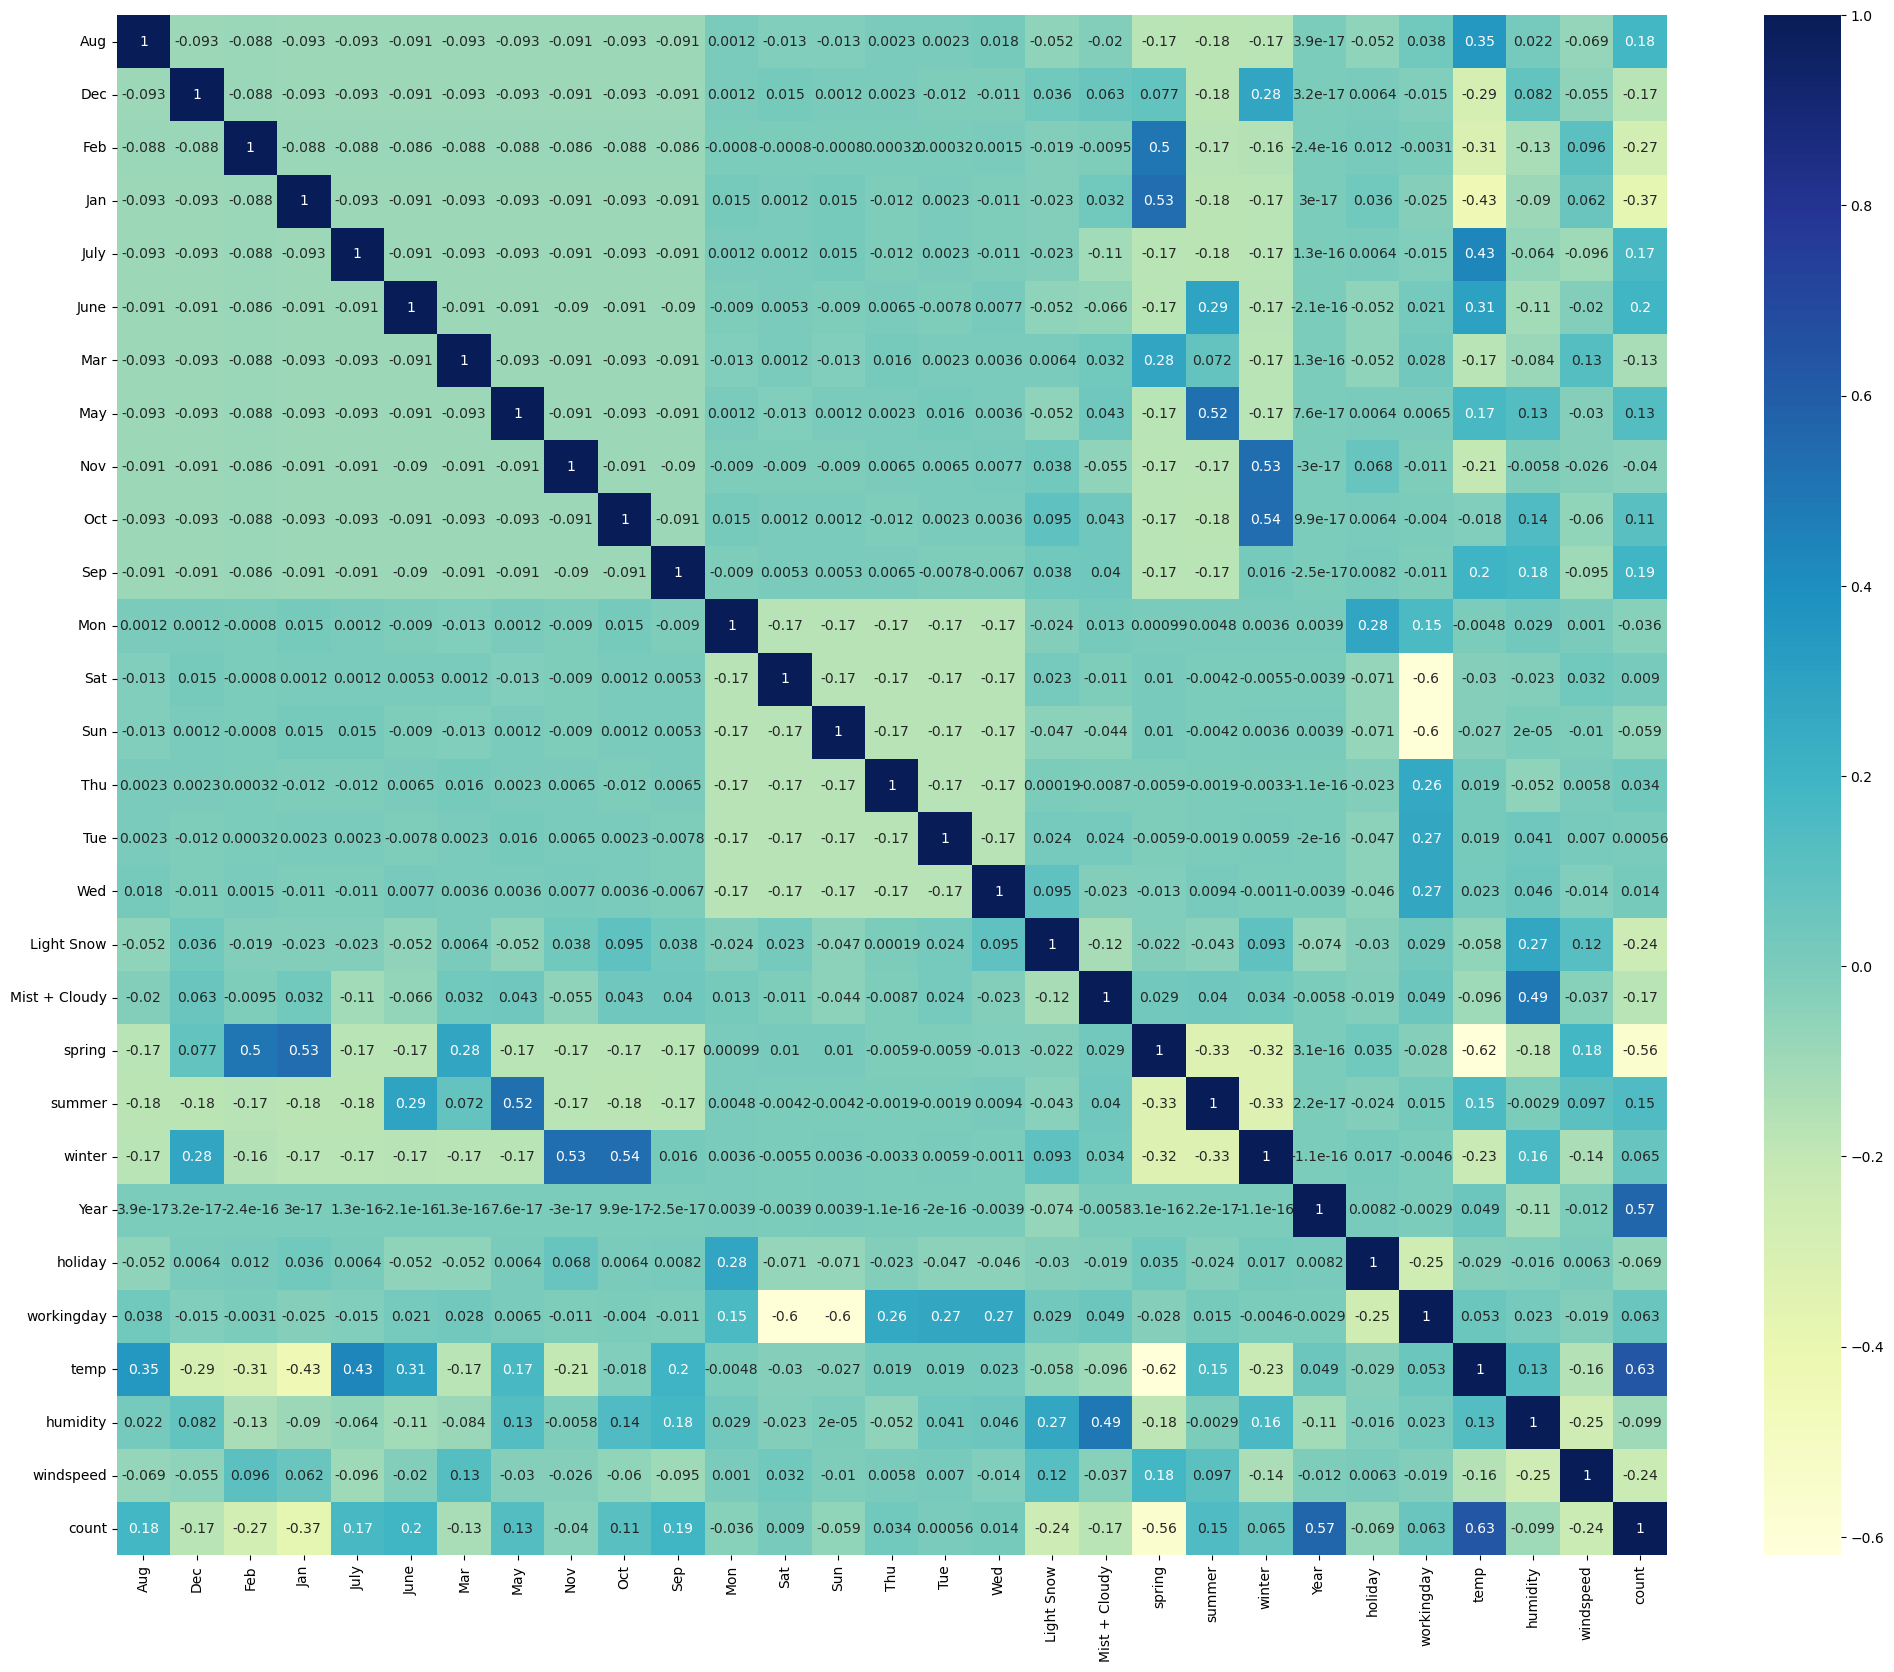

In [32]:
# Now lets check the correlation between variables again
# Heatmap to see correlation between variables
plt.figure(figsize=(25, 20))
sns.heatmap(bike.corr(), cmap='YlGnBu', annot = True)
plt.show()

#### It is evident that the 'count' variable shares a strong correlation with temperature, the Summer season, and the months from June to October. These factors appear to significantly impact the number of bike rentals.

## Splitting the data into Training and Testing Sets

#### Prior to constructing the model, it's essential to first divide the data into training and testing sets, and also scale the features.

In [34]:
# Import the train_test_split function from scikit-learn
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
# np.random.seed(30)
bike_train, bike_test = train_test_split(bike, train_size = 0.7, random_state = 100)

In [35]:
# Rows and columns after split
print(bike_train.shape)
print(bike_test.shape)

(510, 29)
(220, 29)


### Adjusting the Scale of Features

For the model to be easily understood, it's crucial that all variables are on a consistent scale. We can achieve this through standardization or normalization, which ensures that the units of the obtained coefficients are all on the same scale. Rescaling can typically be done in two common ways:
- Min-Max scaling (Normalisation): This method rescales the data to fit within a range of 0 and 1.
- Standardisation: This method rescales data to have a mean of 0 and a standard deviation of 1.

#### In this instance, we will employ MinMax scaling.

In [37]:
# Import the MinMaxScaler class from scikit-learn for feature scaling
from sklearn.preprocessing import MinMaxScaler

In [38]:
# Instantiate an object
scaler = MinMaxScaler()

# Create a list of numeric variables
num_vars=['temp','humidity','windspeed','count']

# Fit on data
bike_train[num_vars] = scaler.fit_transform(bike_train[num_vars])
bike_train.head()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,...,spring,summer,winter,Year,holiday,workingday,temp,humidity,windspeed,count
576,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,1,0.815169,0.725633,0.264686,0.827658
426,0,0,0,0,0,0,1,0,0,0,...,1,0,0,1,0,0,0.442393,0.640189,0.255342,0.465255
728,0,1,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0.245101,0.498067,0.663106,0.204096
482,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0.395666,0.504508,0.188475,0.482973
111,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0.345824,0.751824,0.380981,0.191095


In [39]:
# Checking numeric variables(min and max) after scaling
bike_train.describe()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,...,spring,summer,winter,Year,holiday,workingday,temp,humidity,windspeed,count
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.096078,0.084314,0.066667,0.088235,0.076471,0.076471,0.098039,0.084314,0.086275,0.084314,...,0.243137,0.247059,0.247059,0.507843,0.025490,0.676471,0.537440,0.650480,0.320883,0.513499
std,0.294988,0.278131,0.249689,0.283915,0.266010,0.266010,0.297660,0.278131,0.281045,0.278131,...,0.429398,0.431725,0.431725,0.500429,0.157763,0.468282,0.225858,0.145846,0.169803,0.224421
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.542596,0.653714,0.296763,0.518638
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


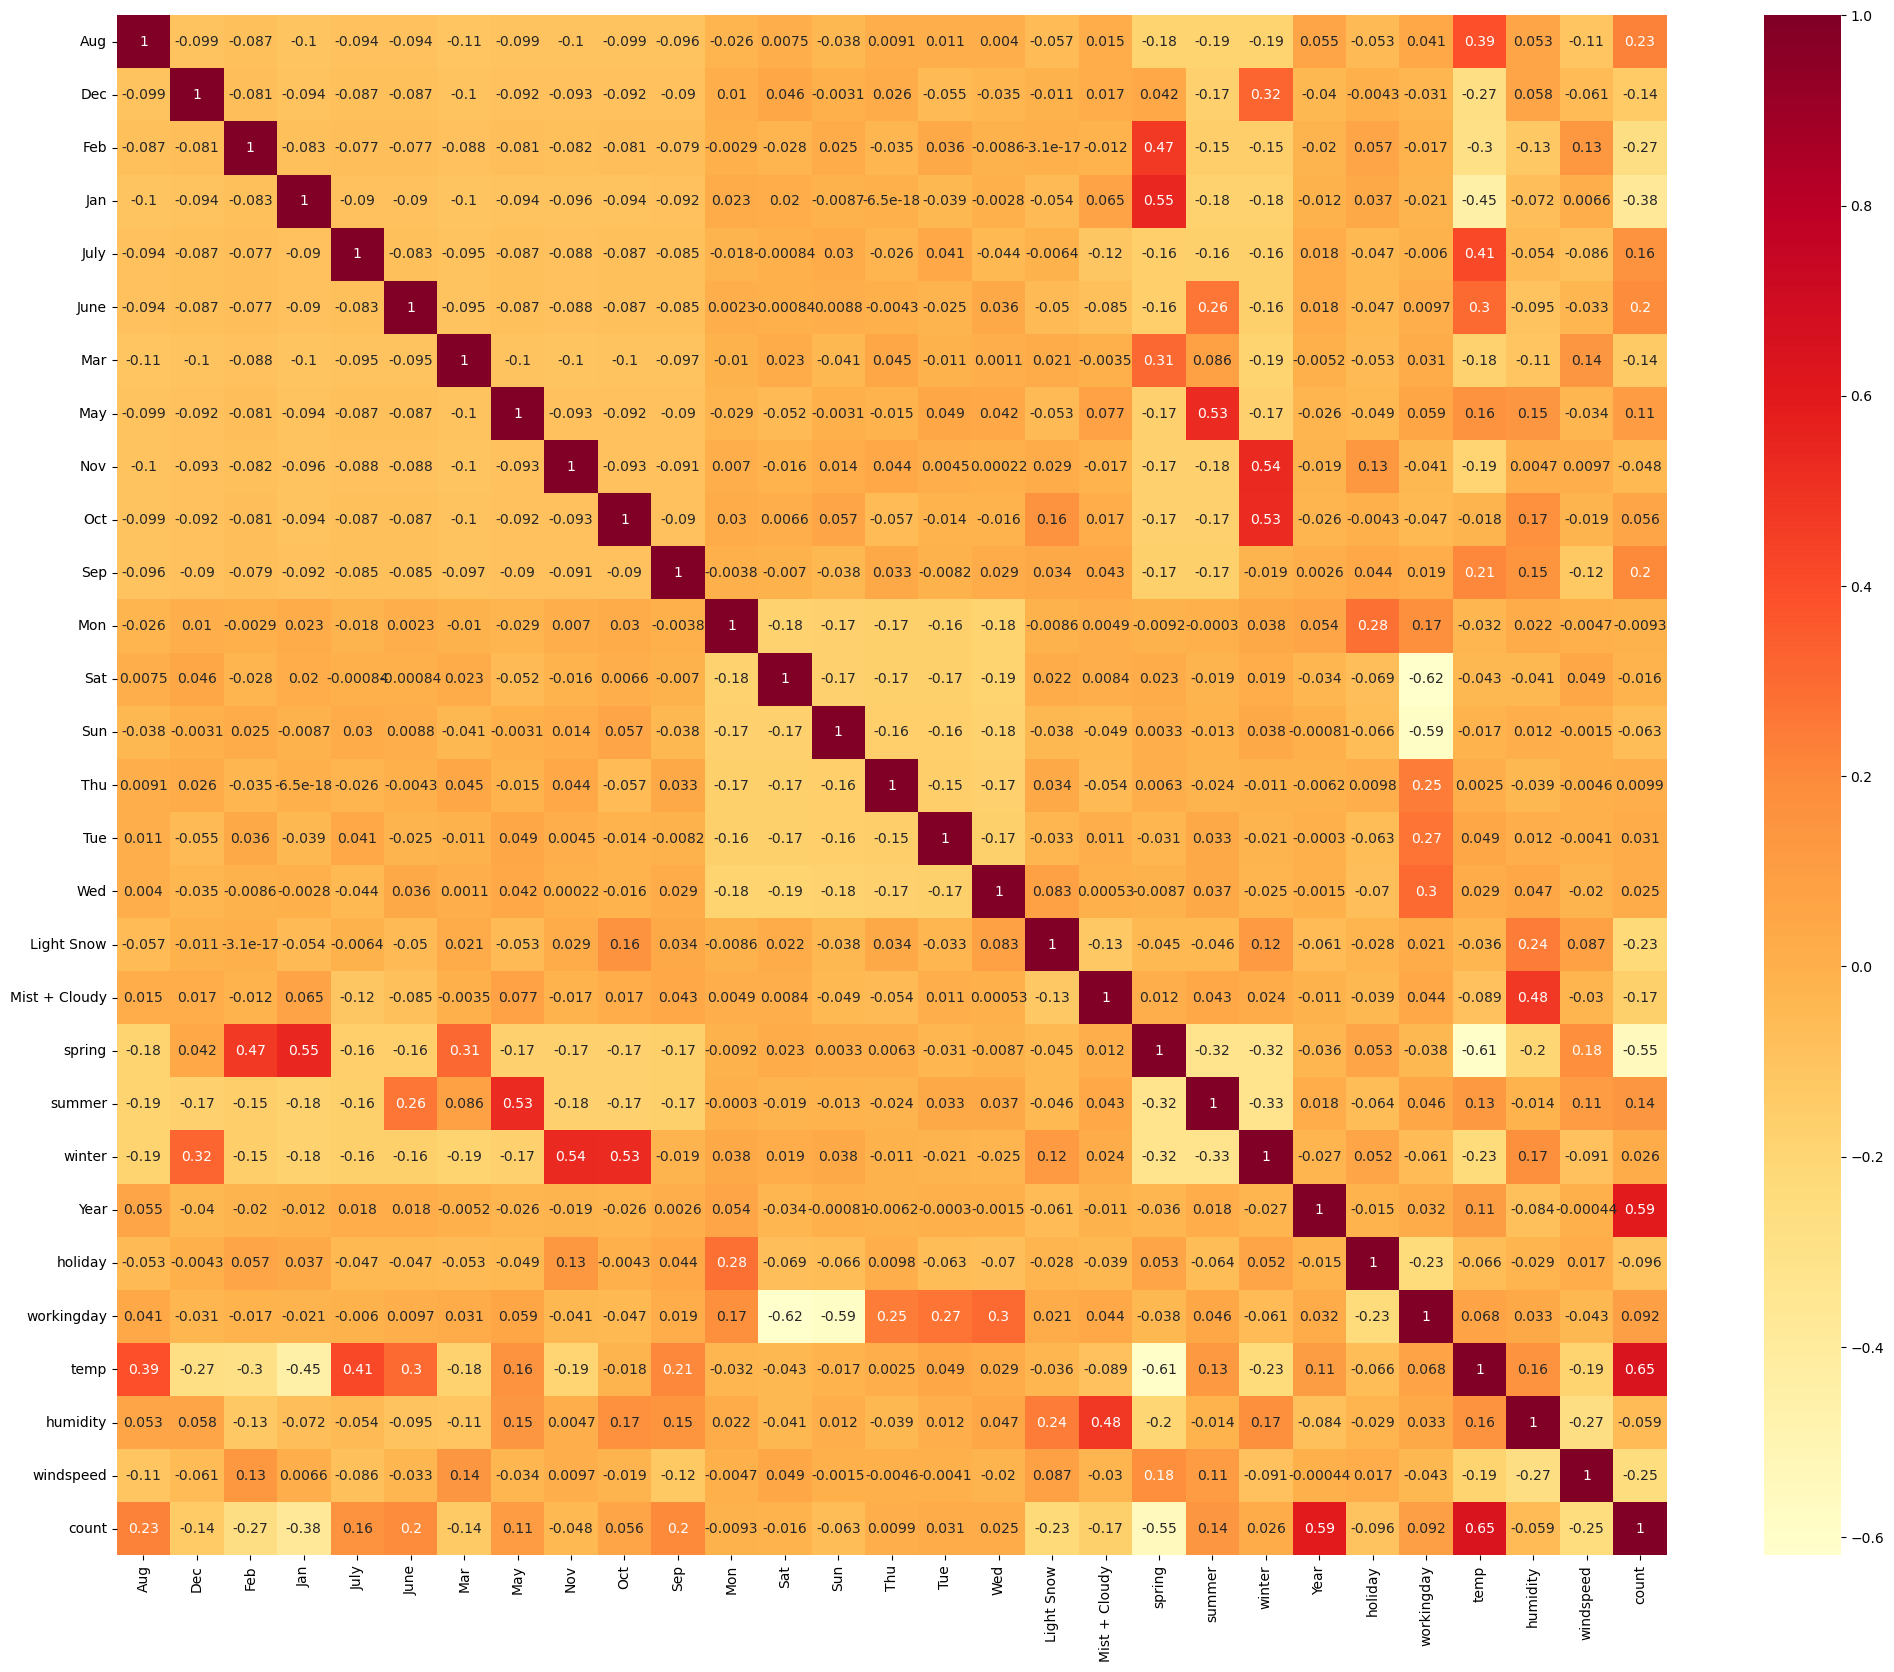

In [40]:
# Let's check the correlation coefficients to see which variables are highly correlated after scaling
# Little to no multicollinearity among predictors

plt.figure(figsize=(25, 20))
sns.heatmap(bike_train.corr(),cmap='YlOrRd',annot = True)
plt.show()

#### The heatmap above reveals that the 'count' variable has a correlation with 'temp' and 'year'. Additionally, the months of August and September show a slightly higher count.

#### Dividing into X and Y sets for the model building

In [41]:
# Divide the data into X and y
y_train = bike_train.pop('count')
X_train = bike_train

# Building a linear model

##### We will utilize the `LinearRegression` function from the SciKit Learn library due to its compatibility with Recursive Feature Elimination (RFE), which is a utility provided by sklearn.


### Recursive Feature Elimination

In [42]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [43]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

# Assuming X_train is your feature matrix
rfe = RFE(lm,n_features_to_select=15)              
rfe = rfe.fit(X_train, y_train)

In [44]:
#List of variables selected
rfe_table=pd.DataFrame(list(zip(X_train.columns,rfe.support_,rfe.ranking_)),columns=["Feature","support","Rank"])
rfe_table.sort_values(by="Rank",ascending=True)

,Feature,support,Rank
27,windspeed,True,1
19,spring,True,1
20,summer,True,1
21,winter,True,1
26,humidity,True,1
12,Sat,True,1
22,Year,True,1
10,Sep,True,1
17,Light Snow,True,1
23,holiday,True,1


In [45]:
# selecting columns where RFE support is True
col = X_train.columns[rfe.support_]
col

Index(['Jan', 'July', 'Sep', 'Sat', 'Light Snow', 'Mist + Cloudy', 'spring',
       'summer', 'winter', 'Year', 'holiday', 'workingday', 'temp', 'humidity',
       'windspeed'],
      dtype='object')

#### Constructing a model utilizing statsmodel to obtain comprehensive statistics.

In [46]:
# Selecting selected feature for model creation
X_train_rfe = X_train[col]

In [47]:
# Add a constant column to the DataFrame 'X_train_rfe' using statsmodels
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_rfe)

In [48]:
# Fit Ordinary Least Squares (OLS) regression model using statsmodels
lm = sm.OLS(y_train,X_train_lm).fit()

In [49]:
# Print the summary of the regression model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.0
Date:                Tue, 04 Jun 2024   Prob (F-statistic):          4.22e-191
Time:                        19:48:30   Log-Likelihood:                 519.65
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     494   BIC:                            -939.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2519      0.036      6.969

# Examining the Variance Inflation Factor (VIF)
#### The Variance Inflation Factor, or VIF, provides a basic quantitative measure of the degree of correlation among the feature variables. It serves as a crucial metric for evaluating our linear model.

In [50]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
13,humidity,29.37
12,temp,17.78
11,workingday,5.31
14,windspeed,4.73
6,spring,4.53
8,winter,3.46
7,summer,2.85
5,Mist + Cloudy,2.29
9,Year,2.09
3,Sat,1.98


#### The 'January' variable appears to be insignificant when considered alongside other variables, as indicated by its high p-value and low VIF. Therefore, it can be omitted.



In [54]:
# Drop January
# Rebuilding the model without 'Jan'
# For more details, visit: http://localhost:8888/notebooks/Boom_Bikes_Linear_Regression_Case_Study.ipynb
X_train_new1 = X_train_rfe.drop(["Jan"], axis = 1)


#### We will now reconstruct the model, excluding ‘January’

In [55]:
# Add a constant column to the DataFrame 'x_train_rfe' using statsmodels
X_train_lm1 = sm.add_constant(X_train_new1)

# Fit Ordinary Least Squares (OLS) regression model using statsmodels
lm1 = sm.OLS(y_train, X_train_lm1).fit()

# Print the summary of the regression model
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     195.7
Date:                Wed, 05 Jun 2024   Prob (F-statistic):          2.11e-191
Time:                        10:52:56   Log-Likelihood:                 517.61
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     495   BIC:                            -941.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2402      0.036      6.714

In [56]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
vif['Features'] = X_train_new1.columns
vif['VIF'] = [variance_inflation_factor(X_train_new1.values, i) for i in range(X_train_new1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,humidity,28.46
11,temp,16.98
10,workingday,5.28
13,windspeed,4.72
5,spring,4.24
7,winter,3.42
6,summer,2.85
4,Mist + Cloudy,2.29
8,Year,2.08
2,Sat,1.97


####  The 'Holiday' variable appears to be insignificant based on its p-value and low VIF. Therefore, we can remove it.

In [57]:
# We will also drop the 'const' variable, as we will recreate it when we build the new model.
X_train_new2 = X_train_lm1.drop(["holiday", "const"], axis = 1)

#### We will now reconstruct the model, excluding ‘holiday’

In [58]:
# Append a constant column to 'x_train_rfe' DataFrame using the statsmodels library
X_train_lm2 = sm.add_constant(X_train_new2)

# Construct an Ordinary Least Squares (OLS) regression model with statsmodels
lm2 = sm.OLS(y_train, X_train_lm2).fit()

# Output the summary statistics of the fitted model
print(lm2.summary())


                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     208.8
Date:                Wed, 05 Jun 2024   Prob (F-statistic):          1.54e-191
Time:                        11:01:51   Log-Likelihood:                 515.15
No. Observations:                 510   AIC:                            -1002.
Df Residuals:                     496   BIC:                            -943.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2307      0.036      6.472

In [59]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
vif['Features'] = X_train_new2.columns
vif['VIF'] = [variance_inflation_factor(X_train_new2.values, i) for i in range(X_train_new2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,humidity,28.38
10,temp,16.88
9,workingday,4.72
12,windspeed,4.70
5,spring,4.18
7,winter,3.39
6,summer,2.84
4,Mist + Cloudy,2.28
8,Year,2.08
2,Sat,1.84


##### Given the high VIF, the 'humidity' variable seems to be insignificant and can be dropped.


In [60]:
# Drop humidity and also the const variable as we will be creating once again when building the new model
X_train_new3=X_train_lm2.drop(["humidity", "const"],axis=1)


#### We will now reconstruct the model, excluding ‘humidity’

In [61]:
# Add a constant column to the DataFrame 'x_train_rfe' using statsmodels
X_train_lm3 = sm.add_constant(X_train_new3)

# Fit Ordinary Least Squares (OLS) regression model using statsmodels
lm3 = sm.OLS(y_train,X_train_lm3).fit()

# Print the summary of the regression model
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     217.2
Date:                Wed, 05 Jun 2024   Prob (F-statistic):          7.12e-189
Time:                        11:08:27   Log-Likelihood:                 506.01
No. Observations:                 510   AIC:                            -986.0
Df Residuals:                     497   BIC:                            -931.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1492      0.031      4.881

In [62]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_new3
vif['Features'] = X_train_new3.columns
vif['VIF'] = [variance_inflation_factor(X_train_new3.values, i) for i in range(X_train_new3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,temp,6.73
9,workingday,4.66
11,windspeed,4.64
5,spring,2.38
6,summer,2.32
8,Year,2.07
7,winter,1.91
2,Sat,1.83
0,July,1.58
4,Mist + Cloudy,1.57


#### Based on the observed p-values and Variance Inflation Factor (VIF), our model is now ready.

- The p-values help us understand the significance of the variables, while the VIF indicates how much the feature variables are correlated with each other. We used these two parameters to decide which variables to exclude from our model.

- A p-value tests the null hypothesis that the coefficient of a term is zero, implying it has no effect. A low p-value (less than 0.05) suggests that we can reject this null hypothesis.

- A common rule of thumb is that if a VIF is greater than 10, there is high multicollinearity. In our case, with VIF values less than 5, we are in a good position to proceed with our regression.

- R-squared measures the strength of the relationship between our model and the dependent variable on a scale of 0 – 100%. Our model has an R-square value of 0.840, or 84.0%.

- The adjusted R-squared compensates for the number of terms in the model. We obtained a value of around 0.836, or 83.6%.

#### Given that both the VIFs and p-values are within an acceptable range, we can confidently make predictions using this model.

## Residual analysis of the training data.

#### One of the key assumptions of linear regression is that the error terms are normally distributed. To verify this, we can plot a histogram of the error terms and examine its shape.

In [63]:
X_train_lm3

,const,July,Sep,Sat,Light Snow,Mist + Cloudy,spring,summer,winter,Year,workingday,temp,windspeed
576,1.0,1,0,0,0,0,0,0,0,1,1,0.815169,0.264686
426,1.0,0,0,1,0,1,1,0,0,1,0,0.442393,0.255342
728,1.0,0,0,0,0,0,1,0,0,1,0,0.245101,0.663106
482,1.0,0,0,1,0,1,0,1,0,1,0,0.395666,0.188475
111,1.0,0,0,0,0,1,0,1,0,0,1,0.345824,0.380981
...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,1.0,0,0,0,0,0,0,0,0,1,1,0.863973,0.187140
53,1.0,0,0,0,0,0,1,0,0,0,1,0.202618,0.111379
350,1.0,0,0,1,0,1,0,0,1,0,0,0.248216,0.431816
79,1.0,0,0,0,0,1,0,1,0,0,1,0.462664,0.529881


In [64]:
#y train predicted
# Predict the target variable 'y_train' using the trained regression model 'lm3' and the DataFrame 'X_train_lm3'
y_train_pred = lm3.predict(X_train_lm3)

Text(0.5, 0, 'Errors')

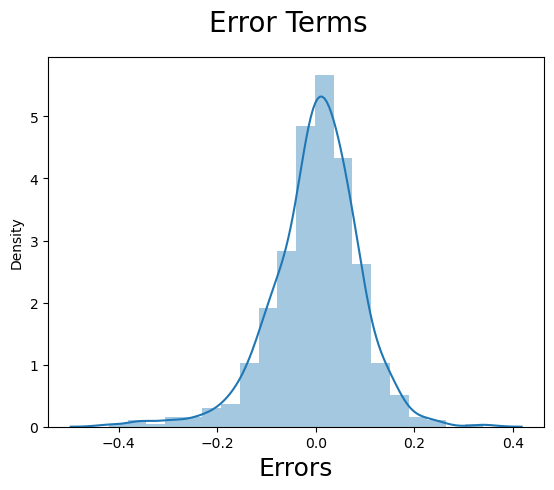

In [65]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)

#### The distribution of error terms seems to be normal

### Now, let's use our final model to make some predictions

#### We also need to apply scaling to the test sets for accurate predictions

In [66]:
# Create a list of numeric variables
num_vars=['temp','humidity','windspeed','count']

# Fit on data
bike_test[num_vars] = scaler.transform(bike_test[num_vars])
bike_test.head()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,...,spring,summer,winter,Year,holiday,workingday,temp,humidity,windspeed,count
184,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0.831783,0.657364,0.084219,0.692706
535,0,0,0,0,0,1,0,0,0,0,...,0,1,0,1,0,1,0.901354,0.610133,0.153728,0.712034
299,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,1,0.511964,0.837699,0.334206,0.303382
221,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0.881625,0.437098,0.339570,0.547400
152,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,1,0.817246,0.314298,0.537414,0.569029


#### Dividing into X_test and y_test


In [67]:
# Dividing into X_test and y_test
y_test = bike_test.pop('count')
X_test = bike_test
X_test.describe()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,...,Mist + Cloudy,spring,summer,winter,Year,holiday,workingday,temp,humidity,windspeed
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.059091,0.086364,0.100000,0.077273,0.104545,0.095455,0.054545,0.086364,0.072727,0.086364,...,0.318182,0.254545,0.263636,0.236364,0.481818,0.036364,0.700000,0.558718,0.638221,0.313293
std,0.236333,0.281541,0.300684,0.267633,0.306665,0.294512,0.227609,0.281541,0.260281,0.281541,...,0.466833,0.436599,0.441609,0.425817,0.500809,0.187620,0.459303,0.233187,0.148694,0.159584
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.046591,0.261915,-0.042808
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.355429,0.529197,0.198843
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.558172,0.625590,0.300126
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.755981,0.743798,0.402718
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.984424,1.002146,0.807474


In [68]:
# Columns
X_train_new3.columns

Index(['July', 'Sep', 'Sat', 'Light Snow', 'Mist + Cloudy', 'spring', 'summer',
       'winter', 'Year', 'workingday', 'temp', 'windspeed'],
      dtype='object')

In [69]:
# It's time to use our model for predictions.

# We'll create a new DataFrame 'X_test_new' by selecting only the columns present in 'X_train_new3' from 'X_test'
X_test_new = X_test[X_train_new3.columns]

# We'll add a constant to 'X_test_new' 
X_test_new1 = sm.add_constant(X_test_new)

# Let's take a look at the first few rows of our test set
X_test_new1.head()


,const,July,Sep,Sat,Light Snow,Mist + Cloudy,spring,summer,winter,Year,workingday,temp,windspeed
184,1.0,1,0,0,0,1,0,0,0,0,0,0.831783,0.084219
535,1.0,0,0,0,0,0,0,1,0,1,1,0.901354,0.153728
299,1.0,0,0,0,0,1,0,0,1,0,1,0.511964,0.334206
221,1.0,0,0,0,0,0,0,0,0,0,1,0.881625,0.339570
152,1.0,0,0,0,0,0,0,1,0,0,1,0.817246,0.537414


In [70]:
# Making predictions
y_pred = lm3.predict(X_test_new1)

#### Finding R-squared and Adjusted R-Squared for Test set

In [71]:
# Evaluate R-square for test
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.808306664630454

In [72]:
#Adjusted R^2
#adj r2=1-(1-R2)*(n-1)/(n-p-1)

#n =sample size , p = number of independent variables

Adj_r2=1-(1-0.808306664630454)*(11-1)/(11-1-1)
print(Adj_r2)

0.7870074051449488


## Model Evaluation

Text(0, 0.5, 'y_pred')

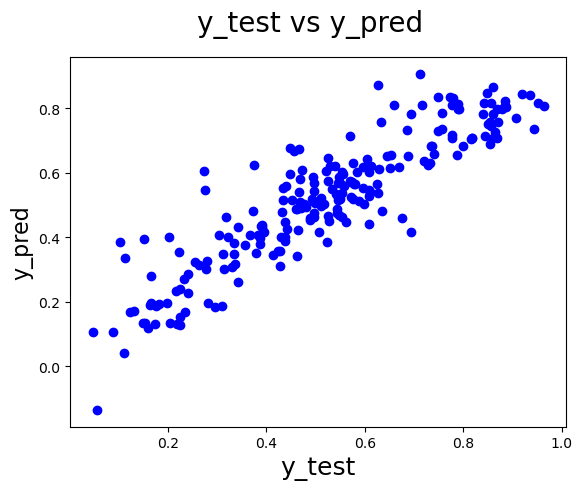

In [73]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred,color='blue')
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16) 

#### Visualising the fit on the test set

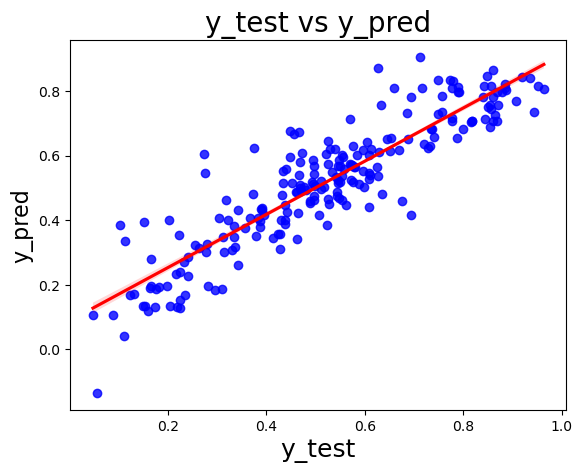

In [75]:
#Regression plot
#plt.figure(figsize=(15,8))
sns.regplot(x=y_test, y=y_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})

plt.title('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label
plt.show()

### The equation for our best fit line is as follows:
- count=0.492×temp+0.0545×workingday+0.2339×Year+0.0838×winter+0.0481×summer+0.074×Sep+0.0664×Sat−0.0486×July−0.2883×Light Snow−0.0817×(Mist + Cloudy)−0.0664×spring−0.1499×windspeed

## Here’s a comparison of the final results between the training and testing models:

- Train R-squared: 0.840
- Train Adjusted R-squared: 0.836
- Test R-squared: 0.808
- Test Adjusted R-squared: 0.787 
- Difference in R-squared between train and test: 3.1%
- Difference in adjusted R-squared between train and test: 4.8% (which is less than 5%)
#### Based on these results, we can confidently say that we have a good model.

## Interpretation:
- We’ve developed a robust model for predicting shared bike demand using significant variables. The ‘temperature’ variable has the highest coefficient (0.492), indicating that a one-unit increase in temperature leads to an increase of 0.492 units in bike rentals. We can observe similar relationships for other variables in the equation.

- Some variables have negative coefficients, suggesting that as these independent variables increase, the dependent variable (bike rentals) tends to decrease. This is true for ‘spring’, ‘mist + cloudy’, and ‘light snow’.

## Business Goals:
### BoomBikes, a US bike-sharing provider, can focus more on the following areas:

- Temperature: As temperature increases, so does the demand for bikes.
- Year: There was more demand for bikes in 2019 than in 2018. As the ongoing Corona pandemic subsides, demand is expected to increase.
- Season & Month: Focus on the summer and winter seasons, as well as the months of August and September. Weekends and working days also show a positive influence on bike rentals.
- Offers: Spring season and ‘mist + cloudy’ and ‘light snow’ weather conditions show negative correlation with bike rentals. Offering promotions during these times could help increase demand.